# Introduction

The purpose of this analysis is to determine if Seattle or Orlando recieves more precipitation in inches. Because this question is so broad I will look to answer this question by focussing on analyzing average yearly and monthly trends to get a better picture of the data. I will answer sub-questions such as which city has a higher monthly mean precipitation and which city has a higher portion of rainy days and how does this vary by month to help me answer the main question as accurately as possible. The data has been narrowed down to 5 years (2018-2022) so all conclusions are based on this subset of data. Each data set also only accounts for one weather station in each city. The dataframe used here was cleaned by me but the original precipitation data comes from NOAA: https://www.ncei.noaa.gov/cdo-web/search 

In [28]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

In [29]:
# load clean data set
df = pd.read_csv(
    'https://raw.githubusercontent.com/naomi-rlm/Weather-Project/main/data/clean_seattle_orlando_weather.csv'
)

# Analysing Daily Precipitation

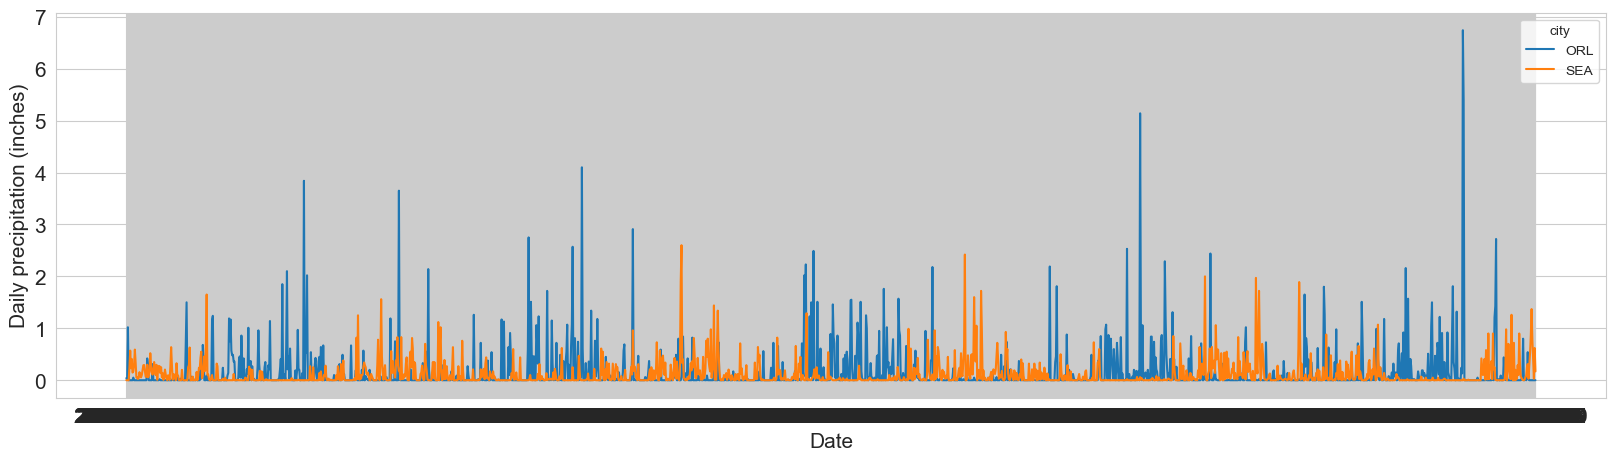

In [30]:
# daily precipitation for both cities on the same graph
plt.figure(figsize=(20, 5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

This graph gives us a visualisation of how much precipitation each city gets on average by day through out the year. From this we can see that Seattle (orange) is a lot more consistent with lighter rain year round while Orlando (blue) has periods of much higher rainfall and periods that fall more in line with Seattle or lower.

In [31]:
# basic numerical summaries for precipitation in each city
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
ORL         1826.0  0.155987  0.448699  0.0  0.0  0.00  0.07  6.74
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60

This table tells us Seattle tends to have more frequent light precipitation, whereas Orlando has less frequent but more intense rainfall. This matches what we see in the graph of the average daily precipitaion throughout the year.

In [51]:
# mean preciptitation values averaged over all days
df[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
ORL,0.155987
SEA,0.113270


From this we can see that on average, Orlando experiences more precipitation per day than Seattle. This result shows that when all days are averaged out, Orlando has the most overall precipitaion.

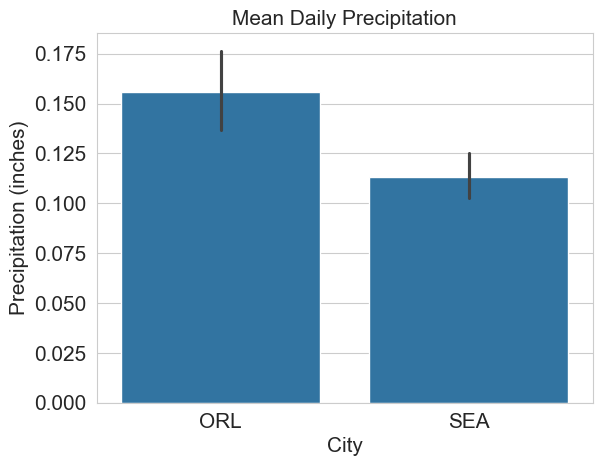

In [33]:
# mean preciptitation values averaged over all days bar graph
sns.barplot(data=df, x='city', y='precipitation')

plt.ylabel('Precipitation (inches)', fontsize=15)
plt.xlabel('City', fontsize=15)
plt.title('Mean Daily Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

This is a visual representation of the previous table showing us again the higher daily average precipitation for Orlando.

# Analyzing Monthly Precipitation

In [34]:
# add column for month to data frame
df['month'] = pd.DatetimeIndex(df['date']).month

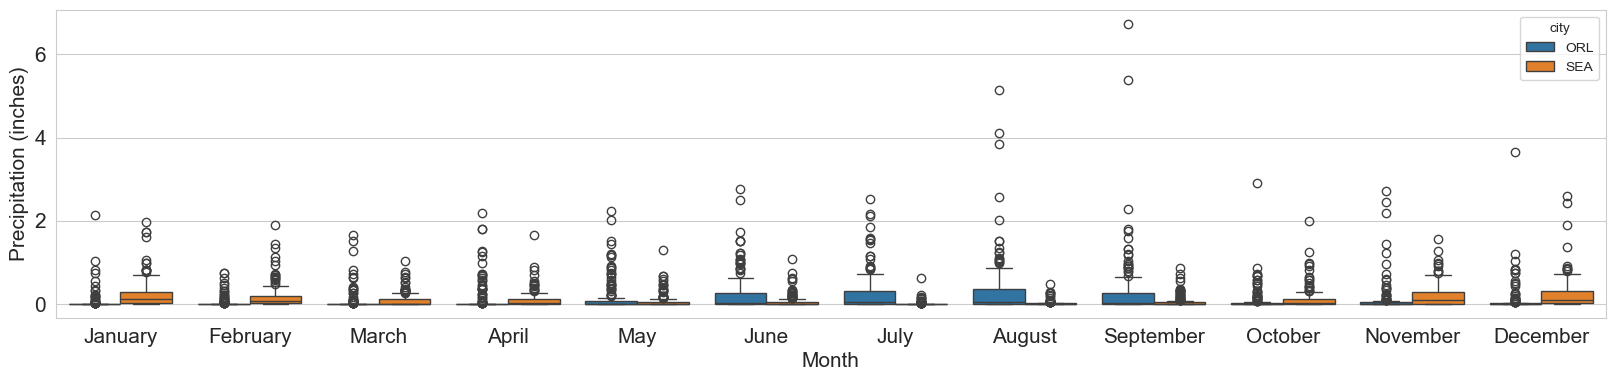

In [35]:
# distribution of precipitation amounts each month using boxplots
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

# Get month names and set as x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:])  # Get month names
plt.xticks(ticks=range(12), labels=month_names)  # Set x-axis ticks to month names

plt.show()

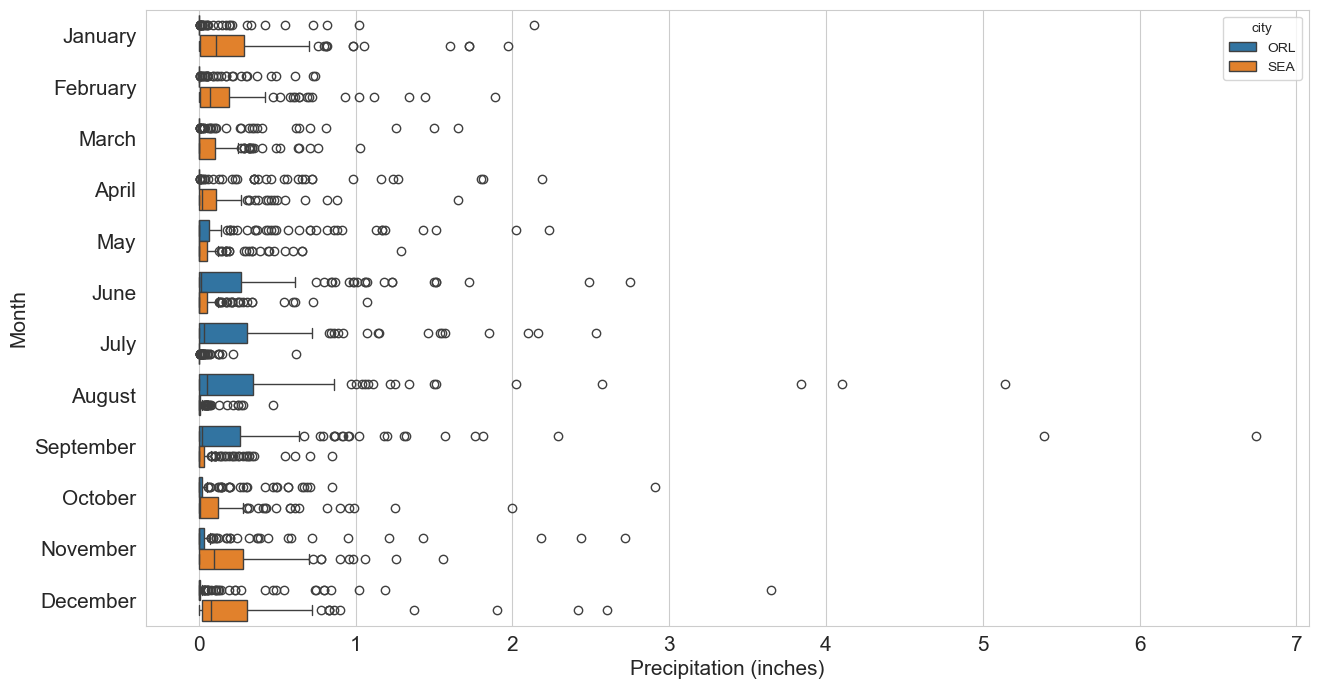

In [36]:
# plot horizontal
plt.figure(figsize=(15, 8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.ylabel('Month', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)

plt.show()

This boxplot shows the monthly distribution of daily precipitation for Orlando and Seattle

Seattle (orange boxes) displays relatively consistent light rainfall throughout the year, with medians mostly close to zero and generally small interquartile ranges, indicating frequent light precipitation. There are few extreme outliers, meaning Seattle rarely experiences very heavy daily rainfall.

Orlando (blue boxes) shows much greater variability, particularly during the months of August and September. The boxes are taller and have more extreme outliers during these months, indicating more intense rainfall. This could indicate tropical storms which would cause such heavy precipitation.

From October through April, Orlando’s precipitation distribution is relatively low and stable, and shows less precipitaion than Seattle. 

This tells us overall that Seattle has consistent yet low precipitaion year round while Orlando likely has fewer days of precipitation but has heavier rain events when precipitation does occur. This makes its average yearly precipitation higher than Seattle's even though this isn't reflected to be true across most months.

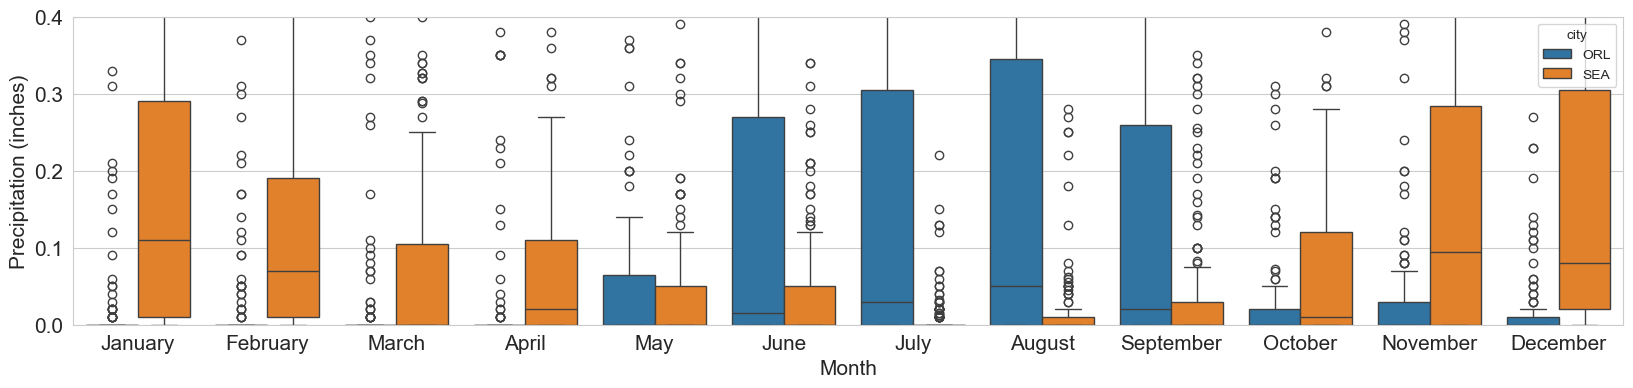

In [37]:
# zoom in on precipitation axis
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.ylim(0, 0.4)

plt.show()

This graph zooms in on the precipitation axis, cutting off outliers but giving us a better view of the interquartile ranges. This shows like the previous graph that October through April Seattle tends to have higher precipitation, while May through September it's reversed.

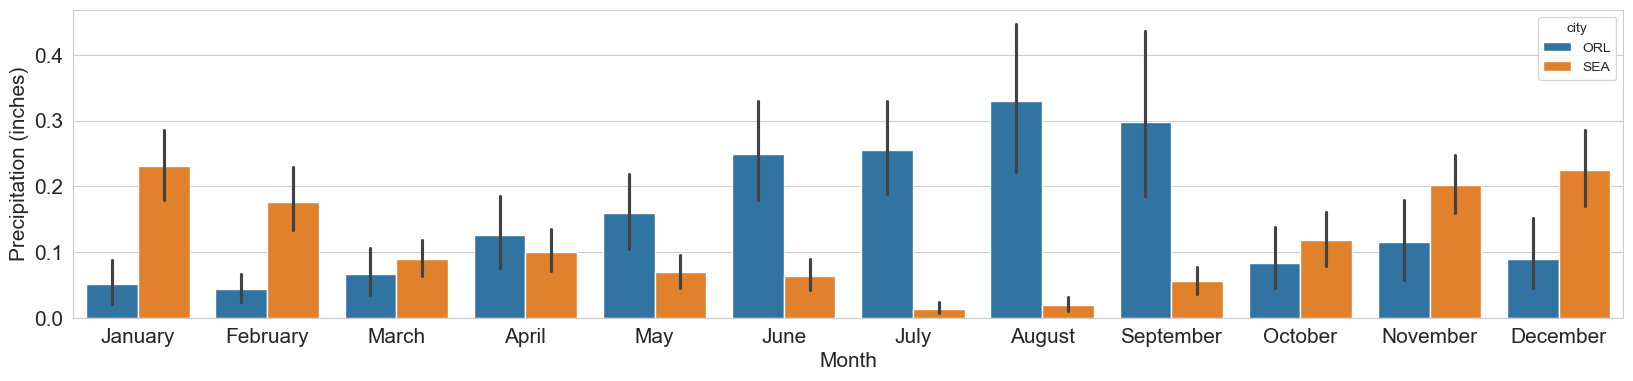

In [52]:
# mean precipitation for each month
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.show()

Seattle has its highest mean daily precipitation during the winter months roughly November through February, when it consistently exceeds Orlando’s levels. This reflects Seattle’s typical wet winter season.

Orlando experiences a sharp increase in precipitation during the summer months June through September, far surpassing Seattle during this period. This aligns with Orlando’s wet season caused by thunderstorms and tropical weather systems.

In March, April and October, precipitation levels for both cities are more comparable, with neither city dominating by a large margin.

In [53]:
# compute mean daily precipitation each month
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
ORL  1           0.050581
     2           0.043050
     3           0.067290
     4           0.126000
     5           0.159032
     6           0.249867
     7           0.254968
     8           0.330581
     9           0.297733
     10          0.083500
     11          0.114533
     12          0.089806
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

This is a table representing the data in the graph above numerically

In [40]:
# calculating the average total monthly precipitation over 5 years for each city.
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).sum() / 5

precipitation
city month               
ORL  1           1.568000
     2           1.214000
     3           2.086000
     4           3.780000
     5           4.930000
     6           7.496000
     7           7.904000
     8          10.248000
     9           8.932000
     10          2.588500
     11          3.436000
     12          2.784000
SEA  1           7.153000
     2           4.976500
     3           2.761333
     4           3.014500
     5           2.144000
     6           1.895000
     7           0.433500
     8           0.619833
     9           1.668667
     10          3.672000
     11          6.056000
     12          6.972000

This table shows the average monthly total precipitation (in inches) for each city, averaged over 5 years, giving you typical monthly rainfall totals for each month.

# Analyzing Number of Days With Precipitation

In [41]:
# add variable to data frame that indicates whether there was any precipitation
df['any_precipitation'] = df['precipitation'] > 0

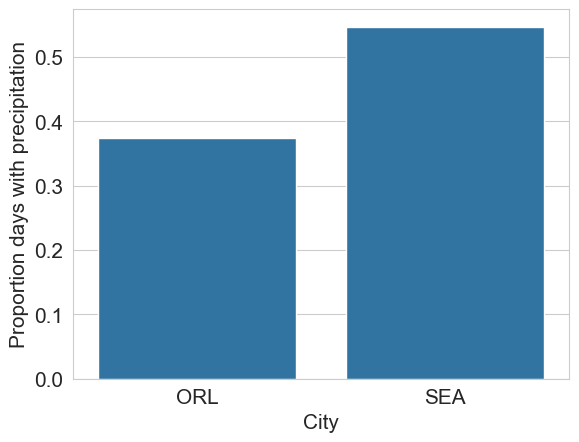

In [42]:
# proportion of days with any precipitation over 5 years
sns.barplot(data=df, x='city', y='any_precipitation', errorbar=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion days with precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

Seattle has precipitation on about 55% of days, meaning it rains more than half the days of the year on average. Based on this and knowing Orlando has higher yearly precipitation, we can conclude that Seattle has more frequent rainy days on average throughout the year, but usually lighter rainfall.

Orlando has precipitation on roughly 37% of days, indicating fewer rainy days compared to Seattle. Based on this and knowing Orlando has higher yearly precipitation, we an conclude that Orlando has fewer rainy days than Seattle on average throughout the year, but when it rains, it tends to be heavier.

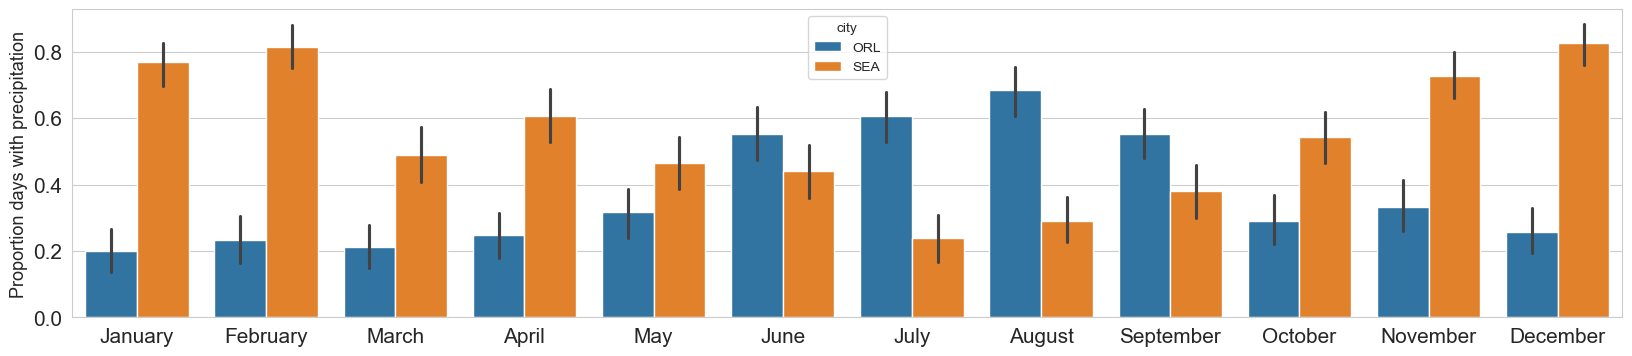

In [43]:
# proportion of days with precipitation each month
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=13)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

plt.show()

Seattle has a high proportion of rainy days in October through April, with roughly 50–80% of days having precipitation during those months. Orlando, in contrast, has low proportions of rainy days in winter and spring, generally below 30%.

From June through September, the pattern reverses. Orlando has a high proportion of rainy days about 50–70%, peaking in July and August. Seattle experiences its driest period in these months, with most lower than 40% of days recording precipitation.

# Analzying Statistical T-Tests

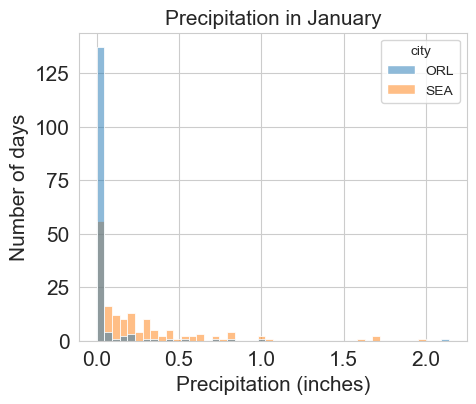

In [44]:
# Select graphs, 
# mean daily precipitation, 
# mean precipitation each month, 
# proportion of days with any precipitation,
# proportion of days with precipitation each month

# statistical t-test for differences in mean precipitation each month between cities
plt.figure(figsize=(5, 4))

sns.histplot(data=df.loc[df['month'] == 1], x='precipitation', hue='city')

plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Number of days', fontsize=15)
plt.title('Precipitation in January', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

This histogram shows the distribution of daily precipitation amounts in January for Orlando and Seattle. Seattle has more frequent days with measurable precipitation in January, as seen by the many orange bars above 0.0 inches. There’s a spread of light to moderate precipitation amounts, though most days still fall below 0.5 inches. Orlando has many more days without precipitation, shown by the tall blue bar at 0.0 inches, indicating most January days are dry. On days when it does rain, the amounts are typically small and infrequent compared to Seattle.

Both distributions show a long right tail, meaning occasional heavier rainfall, but those events are rare.

In [45]:
from scipy import stats

In [46]:
significance_level = 0.05
significantly_different = np.zeros(12)

# Perform t-test for each month
for month in range(1, 13):
    # Get precipitation data for Seattle and Orlando for the current month
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
    stl_data = df.loc[(df['city'] == 'ORL') & (df['month'] == month), 'precipitation']

    t_statistic, p_value = stats.ttest_ind(sea_data, stl_data, equal_var=False)

    if p_value < significance_level:
        significantly_different[month-1] = 1

    print(f"Month {month}:")
    print(f"  t-statistic = {t_statistic:.2f}")
    print(f"  p-value t test = {p_value:.3f}")
    print("-" * 20)

Month 1:
  t-statistic = 5.53
  p-value t test = 0.000
--------------------
Month 2:
  t-statistic = 4.90
  p-value t test = 0.000
--------------------
Month 3:
  t-statistic = 0.93
  p-value t test = 0.351
--------------------
Month 4:
  t-statistic = -0.77
  p-value t test = 0.442
--------------------
Month 5:
  t-statistic = -2.71
  p-value t test = 0.007
--------------------
Month 6:
  t-statistic = -4.64
  p-value t test = 0.000
--------------------
Month 7:
  t-statistic = -6.43
  p-value t test = 0.000
--------------------
Month 8:
  t-statistic = -5.41
  p-value t test = 0.000
--------------------
Month 9:
  t-statistic = -3.70
  p-value t test = 0.000
--------------------
Month 10:
  t-statistic = 1.14
  p-value t test = 0.256
--------------------
Month 11:
  t-statistic = 2.23
  p-value t test = 0.026
--------------------
Month 12:
  t-statistic = 3.26
  p-value t test = 0.001
--------------------


This code performs independent two-sample t-tests for each month to determine whether mean monthly precipitation differs significantly between Seattle and Orlando at a significance level of 0.05. From this we can conclude there is a significant difference in the mean monthly precipitation in all months except March April and October.

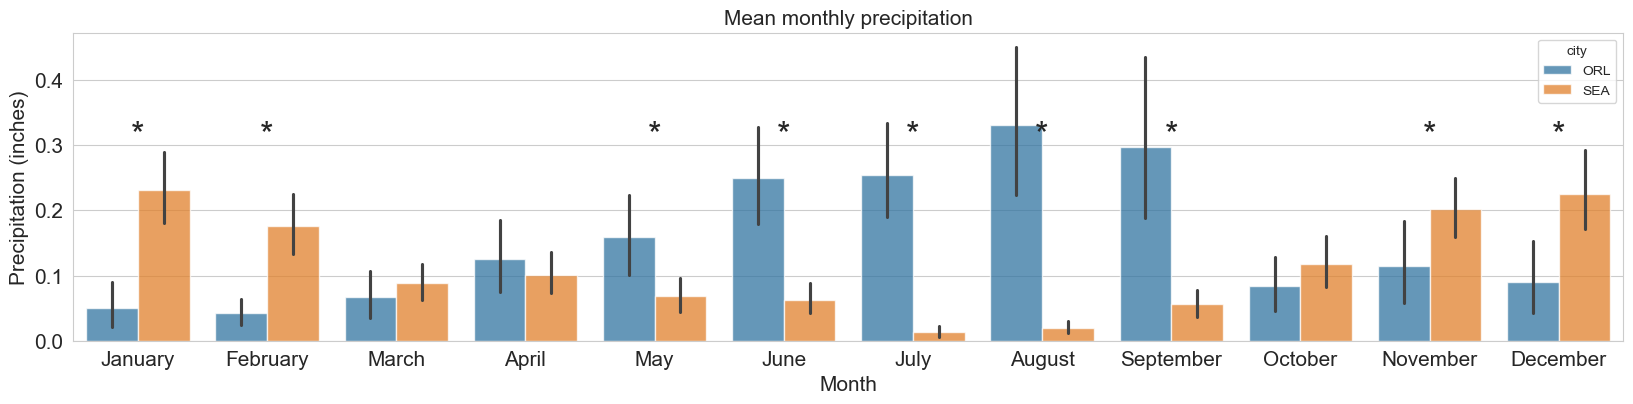

In [47]:
# mean precipitation each month with a star for significant differences
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city', alpha=0.75)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

# Add stars for significantly different months
for month in range(12):
    if significantly_different[month] == 1:

        # Add a star
        plt.text(month, 0.3, '*', ha='center', fontsize=25)

This figure plots the mean montly precipitation for Orlando and Seattle. The asterisks above some months mark where a two-sample t-test found a significant difference between the cities’ monthly means.

Significant months: May through September and November through Febuary

Winter/Late Fall (January, February, November, December): Seattle > Orlando.

Summer/Early Fall (May through September): Orlando > Seattle.

Not statistically significant: March, April, October 

# Analyzing Statistical Z-Tests

In [48]:
# perform a statistical z-test for differences in the proportion of days with any precipitation each month between the cities
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05
significantly_different_proportion = np.zeros(12)

# Perform z-test for each month
for month in range(1, 13):

    # Create a contingency table for Seattle and Orlando for the current month:
    contingency_table = pd.crosstab(
        df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation']
    )

    # Calculate the number of True values (days with precipitation) for each city
    days_with_precipitation = contingency_table[True]

    # Calculate the total number of days for each city
    total_counts = contingency_table.sum(axis=1)

    # Hypothesis test
    zstat, p_value = proportions_ztest(
        count=days_with_precipitation, nobs=total_counts, alternative='two-sided'
    )

    if p_value < significance_level:
        significantly_different_proportion[month-1] = 1

    print(f"Month {month}:")
    print(f"  z-statistic = {zstat:.2f}")
    print(f"  p-value = {p_value:.3f}")
    print("-" * 20)

Month 1:
  z-statistic = -10.00
  p-value = 0.000
--------------------
Month 2:
  z-statistic = -9.78
  p-value = 0.000
--------------------
Month 3:
  z-statistic = -5.11
  p-value = 0.000
--------------------
Month 4:
  z-statistic = -6.30
  p-value = 0.000
--------------------
Month 5:
  z-statistic = -2.68
  p-value = 0.007
--------------------
Month 6:
  z-statistic = 1.96
  p-value = 0.050
--------------------
Month 7:
  z-statistic = 6.55
  p-value = 0.000
--------------------
Month 8:
  z-statistic = 6.93
  p-value = 0.000
--------------------
Month 9:
  z-statistic = 3.01
  p-value = 0.003
--------------------
Month 10:
  z-statistic = -4.49
  p-value = 0.000
--------------------
Month 11:
  z-statistic = -6.83
  p-value = 0.000
--------------------
Month 12:
  z-statistic = -10.03
  p-value = 0.000
--------------------


This code performs two-sample z-tests for differences in the proportion of days with precipitation between Seattle and Orlando for each month. Seattle has a significantly higher proportion of rainy days in most months; January through May and October through December. Orlando surpasses Seattle only July through September and is marginally higher in June (p = 0.05). This renforces previous notions of Seattle having a greater percentage of days yearly with precipitation than Orlando.

In [49]:
contingency_table = pd.crosstab(
        df.loc[df['month'] == 1, 'city'], df.loc[df['month'] == 1, 'any_precipitation']
    )

contingency_table

any_precipitation,False,True
city,,
ORL,124,31
SEA,36,119


This contingency table shows the number of days with vs. without precipitation in January for Orlando and Seattle. Orlando had 31 rainy days out of 155 January days (about 20%) while Seattle had 119 rainy days out of 155 January days (about 77%).

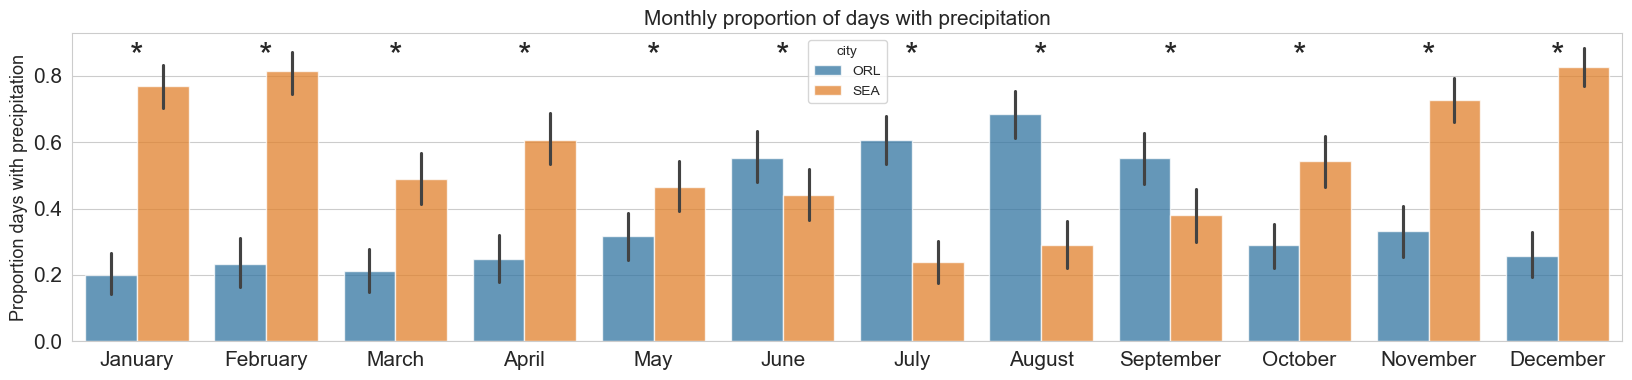

In [50]:
# proportion of days with any precipitation each month with a star for significant differences
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city', alpha=0.75)

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=13)
plt.title('Monthly proportion of days with precipitation', fontsize=15)

plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

# Add stars for significantly different months
for month in range(12):
    if significantly_different_proportion[month] == 1:

        # Add a star
        plt.text(month, 0.825, '*', ha='center', fontsize=25)

plt.show()

This figure visualizes the monthly proportion of days with precipitation for Orlando and Seattle, with asterisks indicating months where the difference between the two cities is statistically significant based on the previous z-tests.

Seattle has a significantly greater proportion of rainy days than Orlando October through May. Orlando shows a sharp increase in the proportion of rainy days June through September, while Seattle reaches its driest period (based on monthly precipitation, not just days with precipitation).

June is right at the threshold (p-value of about 0.05), but still marked significant. This indicates that Orlando does technically have a significantly greater number of days with precipitation than Seattle but this difference is barely meeting this definition. It helps mark the beginning of the transition where Orlando has more days of precipitation than Seattle. 